Xception 12 classes

In [0]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.applications.vgg16 import VGG16
from keras import optimizers
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
import tensorflow as tf

Using TensorFlow backend.


Xception foramoestadb breakfast_burrito/  cup_cakes/  french_fries/   hamburger/
chicken_wings/      donuts/     frozen_yogurt/  hot_dog/
churros/            edamame/    guacamole/      spaghetti_bolognese/

In [0]:
cd /home/davidrendon/Documents/proyectou3deep

/home/davidrendon/Documents/proyectou3deep


In [0]:
ls amoestadb

breakfast_burrito/  cup_cakes/  french_fries/   hamburger/
chicken_wings/      donuts/     frozen_yogurt/  hot_dog/
churros/            edamame/    guacamole/      spaghetti_bolognese/


In [0]:
train_data_dir='amoestadb'


In [0]:
TEST_SPLIT = 0.25
epochs = 80
#batch_size = 16
batch_size=32
MICRO_DATA = True # very small subset (just 3 groups)
SAMPLE_TRAINING = False # make train set smaller for faster iteration
IMG_SIZE = (112, 112)
LEARNING_RATE = 0.001
seed=1

In [0]:

train_datagen = ImageDataGenerator(rescale=1/255.,
    horizontal_flip=False,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=IMG_SIZE,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',seed=seed) # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=IMG_SIZE,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',seed=seed) # set as validation data

Found 9404 images belonging to 12 classes.
Found 2344 images belonging to 12 classes.


In [0]:
from keras import applications
model = applications.Xception(weights='imagenet', 
                                include_top=False, input_shape = (112,112,3))

In [0]:
len(model.layers)

132

In [0]:
for layer in model.layers[:40]:
    layer.trainable = False
regparameter=0.0001

x = model.output
x = Flatten()(x)
x = Dense(256, activation="relu",kernel_regularizer=tf.keras.regularizers.l1_l2(l1=regparameter,l2=regparameter))(x)
x = Dropout(0.4)(x)
x = Dense(4096, activation="relu")(x)
predictions = Dense(12, activation="softmax")(x)

# creating the final model 
model_final = Model(input = model.input, output = predictions)

# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics=["accuracy"])
model_final.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 112, 112, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 55, 55, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 55, 55, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 55, 55, 32)   0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

/home/davidrendon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]


In [0]:
chkpt = ModelCheckpoint(filepath='best_model_amodb12classes.hdf5', save_best_only=True, save_weights_only=True)

In [0]:
tf.keras.callbacks.ModelCheckpoint

tensorflow.python.keras.callbacks.ModelCheckpoint

In [0]:
pwd

'/home/davidrendon/Documents/proyectou3deep'

In [0]:
model_final.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 50,callbacks=[chkpt])

Epoch 1/50
293/293 [==============================] - 322s 1s/step - loss: 0.5602 - accuracy: 0.9516 - val_loss: 0.9541 - val_accuracy: 0.7637
Epoch 2/50
293/293 [==============================] - 319s 1s/step - loss: 0.2946 - accuracy: 0.9722 - val_loss: 3.0693 - val_accuracy: 0.6925
Epoch 3/50
293/293 [==============================] - 319s 1s/step - loss: 0.2548 - accuracy: 0.9748 - val_loss: 1.2207 - val_accuracy: 0.7461
Epoch 4/50
293/293 [==============================] - 319s 1s/step - loss: 0.2486 - accuracy: 0.9812 - val_loss: 0.7425 - val_accuracy: 0.7552
Epoch 5/50
293/293 [==============================] - 319s 1s/step - loss: 0.2335 - accuracy: 0.9780 - val_loss: 1.2458 - val_accuracy: 0.7599
Epoch 6/50
293/293 [==============================] - 321s 1s/step - loss: 0.1910 - accuracy: 0.9837 - val_loss: 1.3682 - val_accuracy: 0.7643
Epoch 7/50
293/293 [==============================] - 321s 1s/step - loss: 0.1953 - accuracy: 0.9844 - val_loss: 0.7092 - val_accuracy: 0.7630

In [0]:
model_final.save('amodbmodel40')

In [0]:
prob=model_final.predict(validation_generator)


In [0]:
import numpy as np
ypred=np.argmax(prob,axis=1)

In [0]:
y_true=validation_generator.classes

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, ypred)

0.0780716723549488

In [0]:
cf=tf.math.confusion_matrix(y_true,ypred).numpy

In [0]:
cff=[[16, 12, 25, 12, 30, 16, 20, 16,  9,  7, 19, 16],
       [ 8, 16, 16, 11, 24, 16, 20, 21, 14,  9, 28, 16],
       [ 7, 22, 14, 10, 19, 12, 33, 23, 13, 14, 14, 18],
       [10, 17, 18, 12, 36, 15, 26, 16,  5, 14, 15, 12],
       [13, 14, 19, 10, 20,  7, 26, 23, 13, 15, 21, 10],
       [ 9, 16, 16, 11, 24, 15, 31, 28,  9, 11, 17, 12],
       [ 5, 18, 18, 16, 30, 16, 17, 20, 11,  8, 25, 15],
       [ 8, 14, 18, 14, 28,  6, 29, 26, 11, 12, 19, 14],
       [ 8, 23, 16, 14, 36, 17, 15, 21,  9, 13, 14, 12],
       [ 7, 20, 13, 15, 26, 14, 16, 18,  6,  5, 18,  8],
       [15, 19, 13, 14, 20,  3, 23, 31, 11, 10, 24, 15],
       [14, 24, 20, 10, 28, 16, 24, 26,  7,  7, 17,  9]]

In [0]:
cd amoestadb

/home/davidrendon/Documents/proyectou3deep/amoestadb


In [0]:
import os 
listdir=os.listdir()

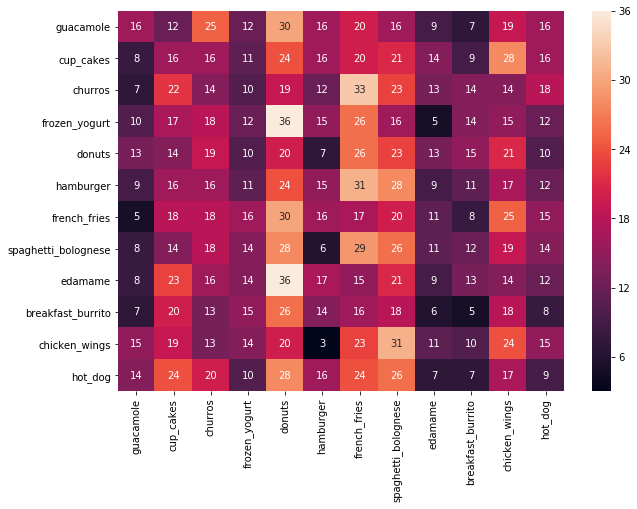

In [0]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cff, index = [i for i in listdir],
                  columns = [i for i in listdir])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

#Second attemp

In [0]:
from keras import applications
model = applications.Xception(weights='imagenet', 
                                include_top=False, input_shape = (112,112,3))
for layer in model.layers[:100]:
    layer.trainable = False
regparameter=0.0001

x = model.output
x = Flatten()(x)
x = Dense(256, activation="relu",kernel_regularizer=tf.keras.regularizers.l1_l2(l1=regparameter,l2=regparameter))(x)
x = Dropout(0.4)(x)
x = Dense(4096, activation="relu")(x)
predictions = Dense(12, activation="softmax")(x)

# creating the final model 
model_final = Model(input = model.input, output = predictions)

# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics=["accuracy"])
model_final.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 112, 112, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 55, 55, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 55, 55, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 55, 55, 32)   0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

/home/davidrendon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  app.launch_new_instance()


In [0]:
model_final.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 50,callbacks=[chkpt])

Epoch 1/50
293/293 [==============================] - 245s 835ms/step - loss: 2.4305 - accuracy: 0.5385 - val_loss: 1.0950 - val_accuracy: 0.7098
Epoch 2/50
293/293 [==============================] - 242s 825ms/step - loss: 1.1490 - accuracy: 0.7601 - val_loss: 1.3582 - val_accuracy: 0.6977
Epoch 3/50
293/293 [==============================] - 242s 825ms/step - loss: 0.8542 - accuracy: 0.8231 - val_loss: 0.9967 - val_accuracy: 0.7366
Epoch 4/50
293/293 [==============================] - 242s 827ms/step - loss: 0.7296 - accuracy: 0.8661 - val_loss: 1.0818 - val_accuracy: 0.8010
Epoch 5/50
293/293 [==============================] - 240s 820ms/step - loss: 0.5724 - accuracy: 0.8985 - val_loss: 1.3297 - val_accuracy: 0.7491
Epoch 6/50
293/293 [==============================] - 240s 818ms/step - loss: 0.5565 - accuracy: 0.9125 - val_loss: 1.2716 - val_accuracy: 0.7331
Epoch 7/50
293/293 [==============================] - 240s 819ms/step - loss: 0.4922 - accuracy: 0.9239 - val_loss: 0.9574 -

In [0]:
len(validation_generator)

74

In [0]:
numtestsamples= 2344


In [0]:
Y_pred = model.predict_generator(validation_generator,verbose=1)


74/74 [==============================] - 28s 383ms/step


In [0]:
Y_pred

array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.    

In [0]:
y_pred = np.argmax(Y_pred, axis=1)

In [0]:
y_true=validation_generator.classes

In [0]:
accuracy_score(y_true, y_pred)

ValueError: Classification metrics can't handle a mix of multiclass and unknown targets

In [0]:
loss,acc = model_final.evaluate(validation_generator, verbose=1)


74/74 [==============================] - 30s 400ms/step


#  Congelando diferente

In [0]:
IMG_SIZE = (224, 224)
train_datagen = ImageDataGenerator(rescale=1/255.,
    horizontal_flip=False,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=IMG_SIZE,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',seed=seed) # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=IMG_SIZE,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',seed=seed) # set as validation data

Found 9404 images belonging to 12 classes.
Found 2344 images belonging to 12 classes.


In [0]:
print(loss,acc)

7.408198356628418 0.7623720169067383


In [0]:
from keras import applications
model = applications.Xception(weights='imagenet', 
                                include_top=False, input_shape = (224,224,3))



len(model.layers)

for layer in model.layers[:40]:
    layer.trainable = False
regparameter=0.0001

x = model.output
x = Flatten()(x)
x = Dense(256, activation="relu",kernel_regularizer=tf.keras.regularizers.l1_l2(l1=regparameter,l2=regparameter))(x)
x = Dropout(0.4)(x)
x = Dense(4096, activation="relu")(x)
predictions = Dense(12, activation="softmax")(x)

# creating the final model 
model_final = Model(input = model.input, output = predictions)

# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics=["accuracy"])
model_final.summary()

chkpt = ModelCheckpoint(filepath='best_model_amodb12classes224.hdf5', save_best_only=True, save_weights_only=True)

tf.keras.callbacks.ModelCheckpoint





Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

/home/davidrendon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


NameError: name 'pwd' is not defined

In [0]:
model_final.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 100,callbacks=[chkpt])

Epoch 1/100
293/293 [==============================] - 1236s 4s/step - loss: 3.3895 - accuracy: 0.1322 - val_loss: 2.5492 - val_accuracy: 0.1545
Epoch 2/100
293/293 [==============================] - 1232s 4s/step - loss: 2.0984 - accuracy: 0.3503 - val_loss: 2.3983 - val_accuracy: 0.3106
Epoch 3/100
293/293 [==============================] - 1228s 4s/step - loss: 1.7567 - accuracy: 0.5276 - val_loss: 2.2924 - val_accuracy: 0.4498
Epoch 4/100
293/293 [==============================] - 1231s 4s/step - loss: 1.7738 - accuracy: 0.6277 - val_loss: 3.1564 - val_accuracy: 0.4446
Epoch 5/100
293/293 [==============================] - 1226s 4s/step - loss: 1.4757 - accuracy: 0.7519 - val_loss: 2.4234 - val_accuracy: 0.6518
Epoch 6/100
293/293 [==============================] - 1229s 4s/step - loss: 1.1967 - accuracy: 0.8262 - val_loss: 1.5455 - val_accuracy: 0.7426
Epoch 7/100
293/293 [==============================] - 1239s 4s/step - loss: 1.0344 - accuracy: 0.8754 - val_loss: 2.8440 - val_ac

293/293 [==============================] - 1232s 4s/step - loss: 0.6445 - accuracy: 0.9852 - val_loss: 1.2085 - val_accuracy: 0.7997
Epoch 58/100
293/293 [==============================] - 1232s 4s/step - loss: 0.5493 - accuracy: 0.9925 - val_loss: 1.6842 - val_accuracy: 0.8144
Epoch 59/100
293/293 [==============================] - 1230s 4s/step - loss: 0.4630 - accuracy: 0.9943 - val_loss: 1.0354 - val_accuracy: 0.7855
Epoch 60/100
293/293 [==============================] - 1229s 4s/step - loss: 0.4038 - accuracy: 0.9945 - val_loss: 1.2399 - val_accuracy: 0.7535
Epoch 61/100
293/293 [==============================] - 1228s 4s/step - loss: 0.4006 - accuracy: 0.9941 - val_loss: 1.8058 - val_accuracy: 0.8023
Epoch 62/100
293/293 [==============================] - 1230s 4s/step - loss: 0.5035 - accuracy: 0.9924 - val_loss: 2.2094 - val_accuracy: 0.7747
Epoch 63/100
293/293 [==============================] - 1229s 4s/step - loss: 0.4969 - accuracy: 0.9884 - val_loss: 1.1391 - val_accuracy